This notebook runs the deconvolution in-notebook for the purposes of plotting. It does not save anything as a pickle file
nor does it pull from a pickle file.
It runs the deconvolution for 3 different min_event_sizes: 3, 4, and 5. It then displays the chart as well as save as a PNG 
in case the chart rendering doesn't work.


In [1]:
# imports
# deconv library
import sys
#sys.path.append('/Users/hadenpelletier/opt/anaconda3/lib/python3.8/site-packages/')

from FastLZeroSpikeInference import fast
from L0_deconv import fit_lambda, run_l0events

# some classic things
import numpy as np
import os

# to load and save matfiles
import scipy
import pandas as pd
import pickle
import mat73

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import ipywidgets as widgets

def plot_deconv(dff, est, events, times, i, frame_rate=30, ax = []):
    '''
    dff: dF/F NxT array
    est: deconvolution model fit NxT array
    events: event magnitudes, array of size N
    times: event frames/times, array of size N
    i: cell index
    T: length of timeseries (frames)
    frame_rate: default 30
    returns: holoview overlay of traces for single cell, for jupyter interactive notebook
    '''
    dff = dff[i, :]
    est = est[i, :]
    ev = events[i]
    times = times[i]

    # d = np.zeros(T)
    # d[times] = ev

    event_plot = times, -0.5 * np.ones(times.shape)
    #t = T / frame_rate
    # fig = plt.figure()
    if not ax:
      ax = plt.axes()
    ax.eventplot(event_plot,zorder=3,color='red')
    ax.plot(dff+0.5, label='Calcium', color='blue')
    #plt.savefig('event_plot1.png')

    return ax, dff.shape[0]

In [3]:
# import functions that I need to run
from L0_deconv import fit_lambda, run_l0events

In [4]:
mat = mat73.loadmat('ZFc_Revised.mat')

df = pd.DataFrame(mat['ZFc'])
# Cells i
df_test = df[[50,77]].T

In [5]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,33935,33936,33937,33938,33939,33940,33941,33942,33943,33944
50,5.119088,3.742165,2.653757,1.740892,1.870585,2.532843,2.875728,1.808833,1.466227,1.987900,...,-1.106824,-0.899401,-0.309968,-0.542613,-0.837393,-0.707537,-0.916023,-0.193147,-0.578708,0.025149
77,8.380082,7.037275,6.271740,5.837710,4.948901,5.188871,5.094517,4.841700,4.231169,4.416147,...,-0.704753,-0.466559,-1.020664,-0.520445,-0.334317,-0.373912,-0.463251,-0.426778,-0.888043,-0.717072


In [6]:
y = np.array(df_test)
l0 = fit_lambda(y,event_min_size = 3)
dec_l3 = run_l0events(l0,y)


l0 = fit_lambda(y,event_min_size = 4)
dec_l4 = run_l0events(l0,y)


l0 = fit_lambda(y,event_min_size = 5)
dec_l5 = run_l0events(l0,y)

Computing df/f

..done!
Calculating events in progress


/home/howelab/lily/L0_analysis.py:217: UserWarning: Genotype is unknown, assuming halflife of 270 ms
  warnings.warn('Genotype is unknown, assuming halflife of 270 ms')


using bisection
0
right endpoint:512
finding lambda to minimize num events < min size
lambda = 2.6990966796875
.using bisection
0
right endpoint:512
finding lambda to minimize num events < min size
lambda = 2.38433837890625
.done!
Computing df/f..done!
Calculating events in progress
using bisection
0
right endpoint:512
finding lambda to minimize num events < min size
lambda = 4.74884033203125
.using bisection
0
right endpoint:512
finding lambda to minimize num events < min size
lambda = 4.3048095703125
.done!
Computing df/f..done!
Calculating events in progress
using bisection
0
right endpoint:512
finding lambda to minimize num events < min size
lambda = 7.37286376953125
.using bisection
0
right endpoint:512
finding lambda to minimize num events < min size
lambda = 6.85186767578125
.done!


interactive(children=(FloatSlider(value=0.0, description='Frame', max=31945.0), Output()), _dom_classes=('widg…

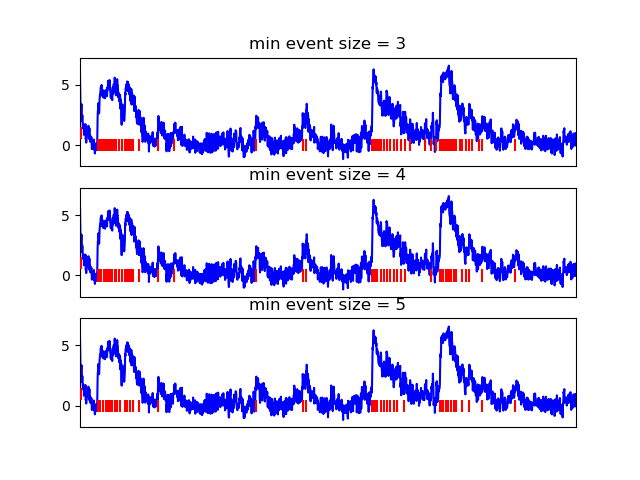

In [9]:
# quick plotting to evaluate result of deconv
#%matplotlib ipympl
%matplotlib widget
from ipywidgets import interact

plt.ioff()
fig, (ax1, ax2,ax3) = plt.subplots(3,1)
i=0
fig.canvas.header_visible = False
_, dff_len = plot_deconv(dec_l3['dff'],dec_l3['est'],dec_l3['events'],dec_l3['times'],i, ax = ax1)
plot_deconv(dec_l4['dff'],dec_l4['est'],dec_l4['events'],dec_l4['times'],i, ax=ax2)
plot_deconv(dec_l5['dff'],dec_l5['est'],dec_l5['events'],dec_l5['times'],i, ax=ax3)
ax1.set_title('min event size = 3')
ax2.set_title('min event size = 4')
ax3.set_title('min event size = 5')
ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
disp_span = 2000

plt.ion()
def update_xlim(val):
    ax1.set_xlim(val,val+disp_span)
    ax2.set_xlim(val,val+disp_span)
    ax3.set_xlim(val,val+disp_span)


interact(update_xlim,val = widgets.FloatSlider(value=0,min=0,max=dff_len-disp_span,
                                                description = 'Frame',
                                                orientation ='horizontal',
                                                ))
plt.savefig('ZFC_events_50_test.png')
plt.show()


interactive(children=(FloatSlider(value=0.0, description='Frame', max=31945.0), Output()), _dom_classes=('widg…

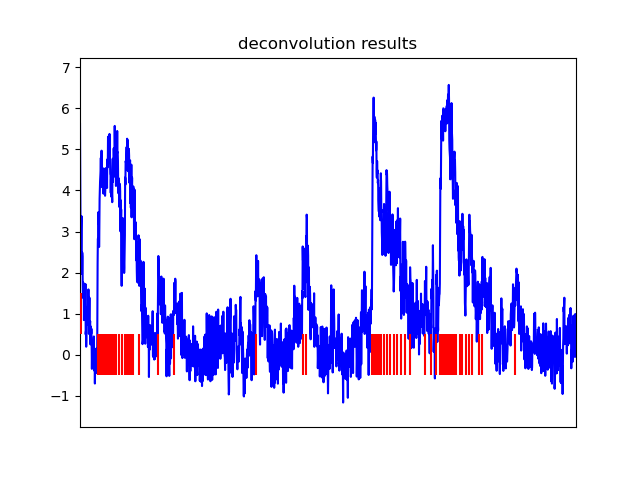

In [8]:
# Plot only 1 subplot instead of 3

#%matplotlib ipympl
%matplotlib widget
from ipywidgets import interact

plt.ioff()
fig, ax1 = plt.subplots(1,1)
i=0
# Change dec to plot only 1 of the min_event_sizes
dec = dec_l3
fig.canvas.header_visible = False
_, dff_len = plot_deconv(dec['dff'],dec['est'],dec['events'],dec['times'],i, ax = ax1)

ax1.set_title('deconvolution results')

ax1.set_xticks([])

disp_span = 2000

plt.ion()
def update_xlim(val):
    ax1.set_xlim(val,val+disp_span)


interact(update_xlim,val = widgets.FloatSlider(value=0,min=0,max=dff_len-disp_span,
                                                description = 'Frame',
                                                orientation ='horizontal',
                                                ))
plt.savefig('ZFC_events_50_test.png')
plt.show()